In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full ,y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [3]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
              "Sandal", "Shirt", "Sneaker", "Bag", "Ankle Boot"]

# Data reshape

In [4]:
X_train_full = X_train_full.reshape((60000,28,28,1))
X_test = X_test.reshape((10000,28,28,1))

# Data normalization

In [5]:
X_train_n = X_train_full / 255.
X_test_n = X_test / 255.

# Train Validation Test data sets

In [6]:
X_valid, X_train = X_train_n[:5000], X_train_n[5000:]
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test_n

# Create the model architecture

In [7]:
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
model = keras.models.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3,3), strides = 1 ,padding = "valid", activation = "relu", input_shape = (28,28,1)))
model.add(keras.layers.MaxPooling2D((2,2)))

model.add(keras.layers.Flatten(input_shape = [28,28]))
model.add(keras.layers.Dense(300, activation = "relu"))
model.add(keras.layers.Dense(100, activation = "relu"))
model.add(keras.layers.Dense(10,activation = "softmax"))

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 5408)              0         
_________________________________________________________________
dense (Dense)                (None, 300)               1622700   
_________________________________________________________________
dense_1 (Dense)              (None, 100)               30100     
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
Total params: 1,654,130
Trainable params: 1,654,130
Non-trainable params: 0
______________________________________________

In [10]:
model.compile(loss = "sparse_categorical_crossentropy",
             optimizer = "sgd",
              metrics = ["accuracy"])

In [11]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("Best_Model.h5", save_best_only=True)

In [12]:
model_history = model.fit(X_train, y_train, epochs=30, batch_size = 64,
                         validation_data = (X_valid,y_valid),
                         callbacks=[checkpoint_cb])

Epoch 1/30
860/860 [==============================] - 23s 26ms/step - loss: 1.2808 - accuracy: 0.5729 - val_loss: 0.7443 - val_accuracy: 0.7376
Epoch 2/30
860/860 [==============================] - 23s 26ms/step - loss: 0.5667 - accuracy: 0.7955 - val_loss: 0.4968 - val_accuracy: 0.8144
Epoch 3/30
860/860 [==============================] - 23s 27ms/step - loss: 0.4948 - accuracy: 0.8207 - val_loss: 0.9007 - val_accuracy: 0.7116
Epoch 4/30
860/860 [==============================] - 21s 25ms/step - loss: 0.4547 - accuracy: 0.8380 - val_loss: 0.4141 - val_accuracy: 0.8566
Epoch 5/30
860/860 [==============================] - 21s 24ms/step - loss: 0.4343 - accuracy: 0.8437 - val_loss: 0.4420 - val_accuracy: 0.8440
Epoch 6/30
860/860 [==============================] - 24s 28ms/step - loss: 0.3986 - accuracy: 0.8559 - val_loss: 0.3779 - val_accuracy: 0.8700
Epoch 7/30
860/860 [==============================] - 24s 27ms/step - loss: 0.3830 - accuracy: 0.8652 - val_loss: 0.4099 - val_accuracy:

(0.0, 1.0)

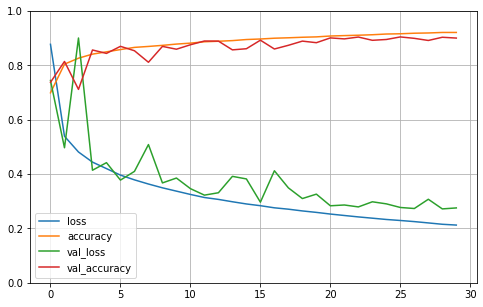

In [13]:
import pandas as pd

pd.DataFrame(model_history.history).plot(figsize = (8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)

In [14]:
ev = model.evaluate(X_test_n, y_test)

313/313 [==============================] - 2s 5ms/step - loss: 0.2856 - accuracy: 0.8988


In [15]:
ev

[0.2856121361255646, 0.8988000154495239]

In [17]:
X_new = X_test[:3]
X_new

array([[[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]]],


       [[[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        [[0.],
         [0.],
         [0.],
         ...,
         [0.],
         [0.],
         [0.]],

        ...,

        [[0.],
 

In [19]:
y_pred = model.predict_classes(X_new)
y_pred

array([9, 2, 1], dtype=int64)

In [20]:
y_test[:3]

array([9, 2, 1], dtype=uint8)

AxesImage(54,36;334.8x217.44)


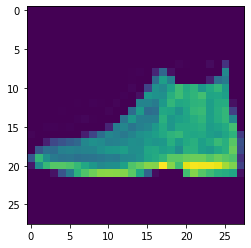

In [23]:
print(plt.imshow(X_test[0].reshape(28,28)))

In [24]:
keras.backend.clear_session

<function tensorflow.python.keras.backend.clear_session()>

In [25]:
del model